# CS110 Fall 2019 - Assignment 3
# COUNTING BLOOM FILTERS

## Question 1

Submit a PDF file with a screenshot of your CS110 dashboard.

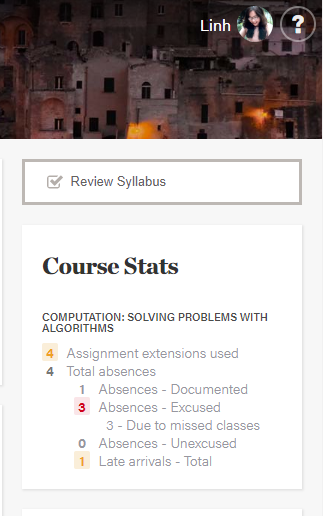

In [1]:
from IPython.display import Image
Image("1.png")

## Question 2

a. Give an overview of the functionality of CBFs, listing all its operations.

* Overview
    - CBF is a special case of the Bloom filter with extra feature. In plain English, Bloom filter is a data structure that is designed to tell you in a rapid and memory-efficient manner, whether a data is present in a set. It could give you a "definite: no, and a "maybe" yes. In academic English, it is a data structure that is specifically useful to test membership of an element in a set. It comprises of an array of m bit. There are only two types of value for each bit: 1 indicating that there is a previously inserted key, and 0 means that no keys have been inserted.
    - The difference between a CBF is that it also has a "counting" features. Each element in the Bloom filter array, regardless of whether it has been inserted or not, would have a corresponding counter. The purpose of the counter is to keep track of the number of elements that have been hashed into the corresponding bit positions. 
    - Due to the presence of the counter, it has the delete operation, while normal Bloom Filter does not.


* Structure: 
    - CBF consists of two arrays, and a (set of) hash function(s). The first array is the one which records the presence of an element, that is, an element(key) would first be processed through the hash function(s), into a number which indicate its positions in the aforementioned array. That position will be turned from 0 to 1. The second array records the number of times that a key is inserted into the corresponding position.
    
    
* Operations:
    - Insert:
            - Description: Note that this operation does not "insert" the exact value of an element in to the filter, rather, it insert the presence of an element into a position in the filter array.
                We have:
                - An m-bit array (denoted the Value array), all bits set to 0.
                - I = 1,2,...,n. This is a set of n elements which we want to insert into the CBF.
                - k hash function f_i (i=1,2,...,k). The purpose of this is to match elements from I to 1,2,...,m.
                - The hash function(s) will calculate for each element in I, a set of k positions (f_1(n_1),f_2(n_1),...,f_k(n_1). Those positions in the m-bit array will be set to 1.
                - C(i) is the counter value at the position f_i(n_1). Each time an element is inserted into a position, its corresponding counter will increase by 1.
                
    - Search:
             - Description: To search for an element s, CBF finds the set of k positions: f_1(s), f_2(s),...,f_k(s) for that elements using the hash functions.
             - If any of the positions has value 0, CBF returns that element s is not in the space. If all of the positions have value 1, CBF returns that element s is in the space.
             - The outcomes for search operation could be:
                 + A true negative: s is not in the space, the function returns that it is not.
                 + A false positive: s is not in the space, the function returns that it is in the space. This happens when a position is the result of the hash functions for many different elements.
                 + A true positive: s is in the space, the function returns that it is.
                 + A false negative: s is in the space, the function returns that it is not. This will be explained in the "Delete" operation.
                 
                 
   - Delete:
             - Description: To delete an element s, CBF finds the set of k positions: f_1(s), f_2(s),...,f_k(s) for that elements using the hash functions.
             - There are two ways to proceed:
                  + A strategy is to decrease the count position by 1 value for each of the positions calculated by the delete function. If after decreasing, a count position is 0, then the corresponding position in the value array is set from 1 to 0.
                  + A better but slower strategy is that CBF will perform the search function first. If the element is indeed has the probability to be in the array, it will proceed to delete as above. If not, it will stop.
              - Because of the delete operation, CBF has a chance of having false negatives. This is because the delete operation can accidentally set a value array's position to 0 due to deletion of other values, that causes the counters to be 0. This could only happen when we delete an element without seaching to see if it is in the table first, as it makes the database that we inserted in in the first place has a smaller size than the universe from which user choose element to delete from. To avoid this, we will choose the second method, which ensures that the total number of elements in the universe that the user use, and the universe containing all elements in the hashed table is the same.

* False positive rate: This is the most common error, and hardest to avoid with CBF. The way to minimize it is to use a good hash function, explained below. 

    According to Wikipedia, the function for the false positive rate is:

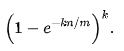

In [43]:
from IPython.display import Image
Image("ass3.1.png")

- k is the number of hash function
- n is the number of element inserted
- m is the number of bits (positions) in the array

b. Give a few examples of computational applications that, in your consideration, can benefit from using CBFs. For every computational application, give meaningful explanations as to why it is a good candidate for CBF.

The most fundamental drawback of CBF is that it has the potential of having a false negative or a false positive output. We could reduce the chances of this problem happening by increasing the number of hash functions, or increasing the complexity of the hash function so that collision is reduced. This, however, could not guarantee for sure that there would be no collision in a position in the value array. On the other hands, its advantages are relatively short running time, and since the stored value are binary values of 1 and 0 (The counter value could also be binary, or it could be a normal number), it does not consume a lot of space.


Therefore, it could be used for when we want to store a large amount of data, we want to search, insert, and possibly delete an entry; and the possibility of a false negative or a false positive does not matter too much. 

Specifically, we could use it to store a dictionary, and the function will have the role of checking if a word is correctly spelled or not. CFB allows us to add new words, delete words, and search for words. The dictionary of a large amount of data would be efficiently stored using this data structure.

Another application is storing usernames, and user could check if their username has been taken if they are registering a new account. Similarly, CFB allows us to add usernames, delete usernames when they are not active, and search for usernames. The large amount of data of usernames would be efficiently stored using this data structure.

It could be used in marketing, particularly suggestions for customers using historical purchase data. When users buy something, it is entered into the database with specific tags (using a set of hash functions). Searching could be used to combine a collection of tags for new suggestions, or the computer could have other suggestion algorithm, and the search function would eliminated the bought items. Deletion could be used to update customer's preferences.

## Question 3

Implement in Python 3 your designed CBFs data structure and all its properties. Justify the choice of hash functions.

* To design CBF, we first choose the hash function(s). This choice depends on size of the inputs, how much we can spare in terms of memory and running time to best minimize collision in a position, and finally, presenting the input value in a way that the hash function can translate into position information to store it.

* A good harsh function for CBF will ideally create a distribution that comes as close to uniform distribution as posible for the hash values, with a view to minimizing collision. There should be less correlation among the positions output from the hash function and the input values, so that a random person would not easily figure out our database and get the information about the users.

* We will choose two hash functions and experiment with different inputs to determine a combination that best satisfies the conditions speficied above. Both functions will have mod array_len to make sure that the position is indeed in the length of the CBF array.


In [78]:
import math
def hash1(key, array_len):
    return (key*221) % array_len
# The first hashfunction is simple. However, it has short running time
# However, this function has a high chance of creating collision. 

def hash2(key, array_len):
    
#The second function is more complicated and would take more running time
    return math.floor(710 * (key % 6)) % array_len

hashfn_list = [hash1, hash2]

The next step is to build the CBF. This assignment will choose one of the examples above: we will design a CBF particularly for checking if an username has been taken before. The database will be a collections of all registered usernames. Creating a class is helpful because we are likely to use call the same operations overtime when using CBF.

In [83]:
import numpy as np
class CBF(object):
    def __init__(self, array_len, hashfn_list):
        self.array_len = array_len
        self.value_array = np.zeros(array_len)
        #the value array that records the presence starts with all 0
        self.count_array = np.zeros(array_len)
        #similarly, the count array that count the number of times 
        #an element is added is 0
        self.num_hashfn = len(hashfn_list)
        self.hashfn_list = hashfn_list
    
    def compute_positions(self, key):
        position_list = []
        for fn in self.hashfn_list:
            position_list.append(fn(key,self.array_len))
        return position_list
    
    def insert(self, key):
        # evaluate hash functions on key
        position_list = self.compute_positions(key)
        for position in position_list:
            self.value_array[position] = 1
            self.count_array[position] += 1
    
    def search(self, key):
        position_list = self.compute_positions(key)
        #calculate the keys
        for position in position_list:
            if self.value_array[position] == 0:
        #if any position is 0, return false
                return False
        return True
    
    def delete(self, key):
        #we choose method 2: search first then delete
        if not self.search(key):
            print('This number is not present in the table')
            return
        position_list = self.compute_positions(key)
        for position in position_list:
            self.count_array[position] -= 1
            #reduce the count by 1
            if self.count_array[position] == 0:
                self.value_array[position] = 0
                #if a count is 0 then the corresponding
                #position in the value array is 0
        

In [97]:
#Test the code
my_cbf = CBF(40, hashfn_list)
my_cbf.insert(5)
my_cbf.search(5)

True

## Question 4

Generate data to push into CBFs. Analyse both theoretically and experimentally:

* Following the case of checking the availability of an username, we will generate databases of different numbers of usernames, each of which has 3 characters.
* In this hypothetical case, we suppose that each username can be a random string of words without a particular meaning.

In [85]:
#first we create the general function to generate a database
import math
import numpy as np
import random
import string

def randomword(length):
    #generate random words using Python built-in function
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

def create_database(data_size, name_size):
    #create a database, the inputs are the size of the name and datbase
    random.seed(221)
    names = []
    for i in range(data_size):
        names.append(randomword(name_size))
    return names

In [86]:
#An output will look like this:
#create a database of names
names = create_database(100000, 3)
# sample names
print(names[:3])

['hnc', 'pir', 'yhy']


* The names are in the form of strings, generated using Python built-in function. However, our hash functions take numbers as input and output numbers for positions. Thus, we will need a convert function to proceed the names before putting them in the hash functions.
* In this case, we will change each name into radix-128 integer. The function is retrieved from "15111 Summer Session One", 2013. This function change the ASCII format generated using Python built-in function above into a number.
* The idea of the function is to represent each character in the string by a number, reduce the size by some functions, then put them together to have a number.

In [87]:
def convert(cbfstring):
    #we take a string from the databse created above, then output
    #a number that is peculiar for that string.
    cbfnum = 0
    for char in cbfstring:
        cbfnum = cbfnum * 128 + ord(char)
    return cbfnum

a. Memory size as a function of the false-positive rate.

Using the "names" database generated above, we will run the test for different memory size (length of array), and the false positive rate. The function for memory size as a function of the false-positive rate is derived as follows:

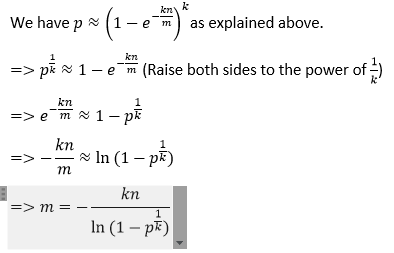

In [88]:
from IPython.display import Image
Image("ass3.2.png")

[1.00000000e-04 1.01989899e-02 2.02979798e-02 3.03969697e-02
 4.04959596e-02 5.05949495e-02 6.06939394e-02 7.07929293e-02
 8.08919192e-02 9.09909091e-02 1.01089899e-01 1.11188889e-01
 1.21287879e-01 1.31386869e-01 1.41485859e-01 1.51584848e-01
 1.61683838e-01 1.71782828e-01 1.81881818e-01 1.91980808e-01
 2.02079798e-01 2.12178788e-01 2.22277778e-01 2.32376768e-01
 2.42475758e-01 2.52574747e-01 2.62673737e-01 2.72772727e-01
 2.82871717e-01 2.92970707e-01 3.03069697e-01 3.13168687e-01
 3.23267677e-01 3.33366667e-01 3.43465657e-01 3.53564646e-01
 3.63663636e-01 3.73762626e-01 3.83861616e-01 3.93960606e-01
 4.04059596e-01 4.14158586e-01 4.24257576e-01 4.34356566e-01
 4.44455556e-01 4.54554545e-01 4.64653535e-01 4.74752525e-01
 4.84851515e-01 4.94950505e-01 5.05049495e-01 5.15148485e-01
 5.25247475e-01 5.35346465e-01 5.45445455e-01 5.55544444e-01
 5.65643434e-01 5.75742424e-01 5.85841414e-01 5.95940404e-01
 6.06039394e-01 6.16138384e-01 6.26237374e-01 6.36336364e-01
 6.46435354e-01 6.565343

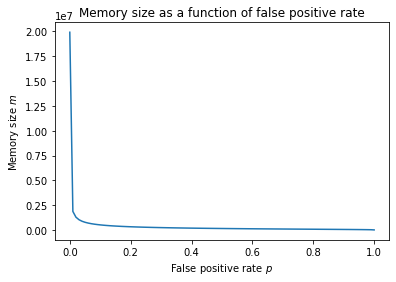

In [89]:
import random
import math
import matplotlib.pyplot as plt
random.seed(221)
memory_size_list = []
false_positive_list = []

false_positive_list = np.linspace(1e-4,.9999,100)
for fp in false_positive_list:
    memory_size = (-2*100000)/(math.log(1-fp**(1/2)))
    memory_size_list.append(memory_size)

plt.plot(false_positive_list, memory_size_list)
plt.xlabel('False positive rate $p$')
plt.ylabel('Memory size $m$')
plt.title('Memory size as a function of false positive rate')
print(false_positive_list)
print(memory_size_list)


As we can see in the graph, as the memory size decreases, false positive rate increases. This is because for a fixed number of hash functions and database, a bigger memory size would allow for more spaces to store the keys, thus reduce the false positive rates. The hash function also depends on the length of the array, thus a bigger array would also add into reduce the collision probability

Using the function CBF we designed, the false positive rate is calculated as FP/N = FP/(FP + TN). N is the total number of negative (from Wikipedia)

[1.00000000e-04 1.01989899e-02 2.02979798e-02 3.03969697e-02
 4.04959596e-02 5.05949495e-02 6.06939394e-02 7.07929293e-02
 8.08919192e-02 9.09909091e-02 1.01089899e-01 1.11188889e-01
 1.21287879e-01 1.31386869e-01 1.41485859e-01 1.51584848e-01
 1.61683838e-01 1.71782828e-01 1.81881818e-01 1.91980808e-01
 2.02079798e-01 2.12178788e-01 2.22277778e-01 2.32376768e-01
 2.42475758e-01 2.52574747e-01 2.62673737e-01 2.72772727e-01
 2.82871717e-01 2.92970707e-01 3.03069697e-01 3.13168687e-01
 3.23267677e-01 3.33366667e-01 3.43465657e-01 3.53564646e-01
 3.63663636e-01 3.73762626e-01 3.83861616e-01 3.93960606e-01
 4.04059596e-01 4.14158586e-01 4.24257576e-01 4.34356566e-01
 4.44455556e-01 4.54554545e-01 4.64653535e-01 4.74752525e-01
 4.84851515e-01 4.94950505e-01 5.05049495e-01 5.15148485e-01
 5.25247475e-01 5.35346465e-01 5.45445455e-01 5.55544444e-01
 5.65643434e-01 5.75742424e-01 5.85841414e-01 5.95940404e-01
 6.06039394e-01 6.16138384e-01 6.26237374e-01 6.36336364e-01
 6.46435354e-01 6.565343

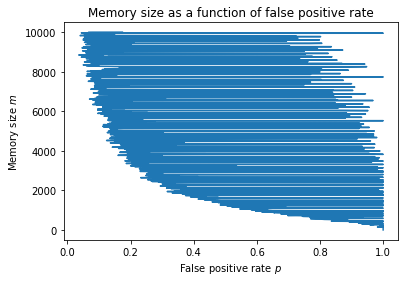

In [100]:
random.seed(221)
def create_database(data_size, name_size):
    #create a database, the inputs are the size of the name and datbase
    random.seed(221)
    names = []
    for i in range(data_size):
        names.append(randomword(name_size))
    return names
# memory_size_list = []
# false_positive_list = []
cbf_list = create_database(1000, 3)

memory_size_list = range(5,10000,10)
fpr_list = []
for m in memory_size_list:
    cbf = CBF(m, hashfn_list)
    for i in cbf_list:
        c = convert(i)
#         print(c)
        cbf.insert(c)
    list_1 = []
    while len(list_1) < 500:
        word = randomword(3)
        if not word in cbf_list:
            list_1.append(word)
#     list_1 = create_database(1000,3) # list_1 contains words not in database
#     for word in list_1:
#         if word in cbf_list:
#             list_1.remove(word)
    count = 0
    for word in list_1:
#         print(cbf.search(convert(word)))
        if cbf.search(convert(word)):
            count += 1
    fpr = count/len(list_1)
    fpr_list.append(fpr)
    

plt.plot(fpr_list, memory_size_list)
plt.xlabel('False positive rate $p$')
plt.ylabel('Memory size $m$')
plt.title('Memory size as a function of false positive rate')


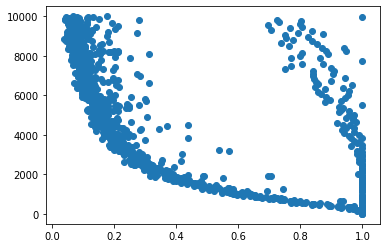

In [101]:
plt.scatter(fpr_list, memory_size_list)

The plot shows that the false positive rate is low when the list is big, and higher when the list is smaller. There are still less frequent cases when a big list has high false positive rate, but that could be due to the generation of database to test.

b. Memory size as a function of the number of items stored

Using the function derived above, now we vary n.

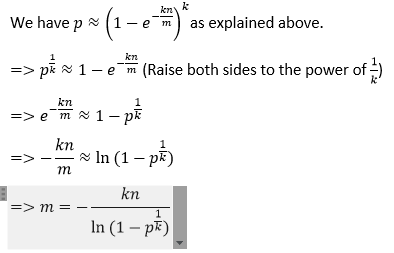

In [102]:
from IPython.display import Image
Image("ass3.2.png")


We know that k > 0.

p is from 0 to 1, thus p^1/k is from 0 to 1.

-> (1 - p^1/k) > 0

Notice that e > (1 - p^1/k) 

-> ln(1- p^1/k) < 0

-> k/ln(1- p^1/k) <0

-> - k/ln(1- p^1/k) > 0

Therefore, n and m is inversely proportional. This do not need experiment tests because the number of elements inserted and list lengths are not related, and can be defined by the user using the code above

c. Access time as a function of the false-positive rate

From Wikipedia, we know that hte optimal value of p for a function depends on the number of hash functions. 


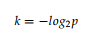

In [103]:
from IPython.display import Image
Image("ass3.3.png")

Text(0.5, 1.0, 'Number of hash functions as a function of false positive rate')

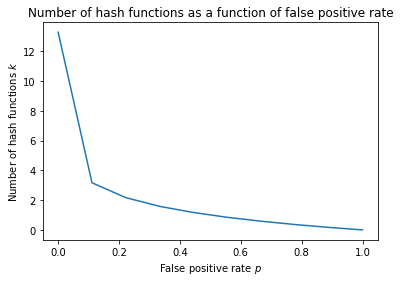

In [108]:
fpr = []

fpr = np.linspace(1e-4,.9999,10)
hash_list=[]
for fp in fpr:
    k = -math.log(fp,2)
    hash_list.append(k)

 
plt.plot(fpr, hash_list)
plt.xlabel('False positive rate $p$')
plt.ylabel('Number of hash functions $k$')
plt.title('Number of hash functions as a function of false positive rate')

As we have more hash functions the false positive rate is smaller. This is because more hash functions takes longer time to calculate the positions for a key, but can reduce the chances of collision, thus smaller false positive rate. The time for comparing the element is always O(1) so it is not considered.

d. Access time as a funtion of the number of items stored.

From Wikipedia, we know that the relationship between the number of hash functions and number of items stored is:

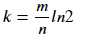

In [109]:
from IPython.display import Image
Image("ass3.4.png")

Text(0.5, 1.0, 'Number of hash functions as a function of the number of items stored')

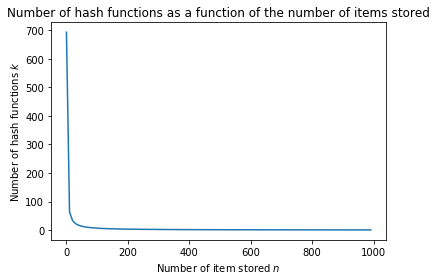

In [113]:
item_stored =range(1,1000,10)
hash_list = []
for item in item_stored:
    k = (1000/item)*(math.log(2))
    hash_list.append(k)

 
plt.plot(item_stored, hash_list)
plt.xlabel('Number of item stored $n$')
plt.ylabel('Number of hash functions $k$')
plt.title('Number of hash functions as a function of the number of items stored')

It seems that from the plot, the less hash functions we have ( a proxy for accessing time), the more items stored. We can use this relationship to calculate a suitable number of hash functions given a number of items needed to be stored so that we are at the optimal number that minimize the access time.

## Question 5

Produce a plot to show that the implementation's false positive rate matches theoretically expected rate

We have done this in question 4a, with comparison of different combinations of memory size and false positive rate

## Question 6

Identify the corner cases for CBFs.

Some corner cases could be:
    1. If we choose the first method of deleting as explained above, there are higher chances of error
    2. A too small hash table size or too few/simple hash functions that cause too much collision

## Appendix

HC footnotes

- breakitdown: the process of breaking it down really helps me to form my thinking of how to approach the assignment from scratch. For each task, I start with the class to see what I need, then build each function. I come back to the elements required for the class function each time a new characteristic is needed to perform a CBF operation. When I find out that the compute_positions and convert are used recursively when breaking the process down, I made individual code for it. The plotting is also made easier by first understanding the formula, setting up test cases, and then plot. It helps me to debug by coding by chunks like this.
- #critique: Critique is used each time I wrote the code. Learnt from the critique I had last assignment, I tried to generalize the code more by having more generalized functions that user can use the different values to plug in. I also create more fucntion and then call it in the main function, which makes the code easier to read, as iterated from the first assignment when the same code written all over again clouds the main ideas and it is harder to read/debug. Learning from the Wikipedia and Comen book, the writing tone is made so that readers can follow the train of thoughts of the writer.
- #interpretivelenses: I used this to present the paper. I choose the audience to be people like me who do not have coding background, thus I tried to make it as easy as possible to understand the concept and the code (breaking it down small with comment), so that anyone can understand this guide. There are plain English explanation accompanying the academic explanations to help too.

## References


15110 SUMMER SESSION ONE - 2013. (2013). Retrieved November 3, 2019, from http://www.cs.cmu.edu/~tcortina/15110m13/lab7/index.html.




Bloom filter. (2019, November 2). Retrieved from https://en.wikipedia.org/wiki/Bloom_filter#Counting_Bloom_filters.



False positive rate. (2019, October 3). Retrieved from https://en.wikipedia.org/wiki/False_positive_rate

Link to the Jupyter notebook: https://drive.google.com/file/d/1HlWKfq02KZioiV9u8WHkh4yeQlWt5Gdv/view?usp=sharing